In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
os.chdir('Titanic')
os.listdir()

['gender_submission.csv', 'test.csv', 'train.csv']

In [82]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [84]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [94]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [93]:
#percentage of missing values
train.isnull().mean()*100
#train.isnull().sum()/len(train)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [95]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [97]:
test.isnull().mean()*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [110]:
train_missing_cols = train.columns[train.isnull().any()]
test_missing_cols = test.columns[test.isnull().any()]

In [132]:
columns = [i for i in train_missing_cols]
missingCount = [train[i].isnull().sum() for i in train_missing_cols]

In [133]:
missingCount

[177, 687, 2]

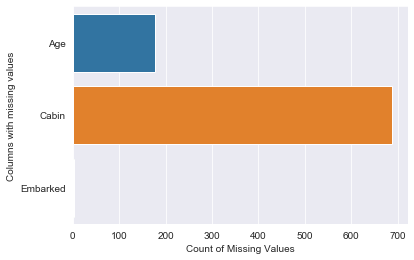

In [143]:
#plt.barh(columns, missingCount, color = 'purple', align='center')
sns.barplot(y=columns, x=missingCount, orient='h')
plt.xlabel('Count of Missing Values')
plt.ylabel('Columns with missing values')
plt.show()

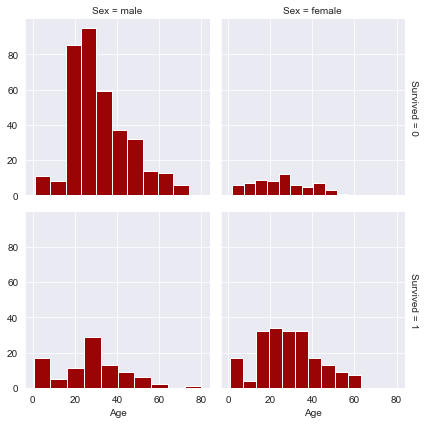

In [149]:
%matplotlib inline
sns.set_style("darkgrid")
plot = sns.FacetGrid(train, row='Survived', col='Sex', margin_titles=True)
plot.map(plt.hist, 'Age', color='#9b0404')

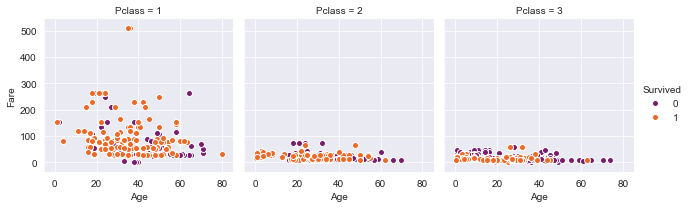

In [153]:
plot = sns.FacetGrid(train, col='Pclass', hue='Survived', palette='inferno')
plot.map(plt.scatter, 'Age', 'Fare',edgecolor="w" ).add_legend()

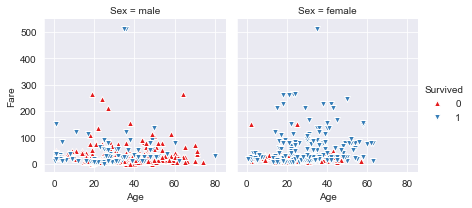

In [164]:
plot = sns.FacetGrid(train, col='Sex', hue='Survived', palette='Set1', hue_kws=dict(marker=["^", "v"]))
plot.map(plt.scatter, 'Age', 'Fare', edgecolor='w').add_legend()

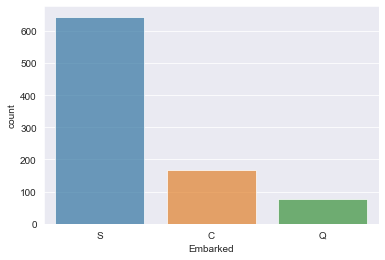

In [169]:
#train.Embarked.value_counts().plot(kind='bar')
sns.countplot(x='Embarked', data=train, alpha=0.7)

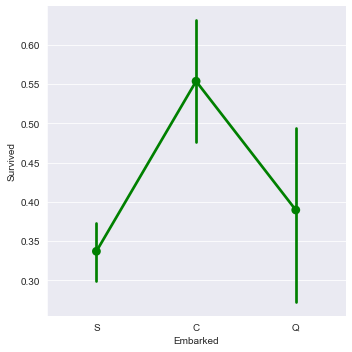

In [171]:
sns.factorplot(x='Embarked', y='Survived', data = train, color='g')

Text(0.5, 0.98, 'Men, Women Survived in each class')

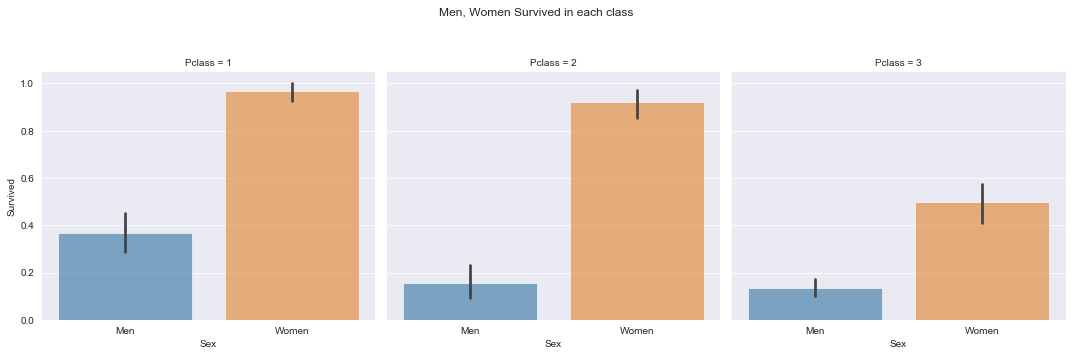

In [197]:
plot = sns.factorplot(x='Sex', y='Survived', col='Pclass', kind='bar', data=train, alpha=0.6)
plot.set_xticklabels(['Men', 'Women'])
plt.subplots_adjust(top=0.8)
plot.fig.suptitle('Men, Women Survived in each class')

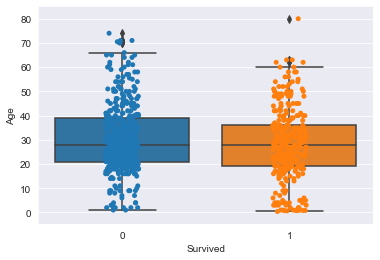

In [198]:
sns.boxplot(x='Survived', y='Age', data=train)
sns.stripplot(x='Survived', y='Age', data=train)

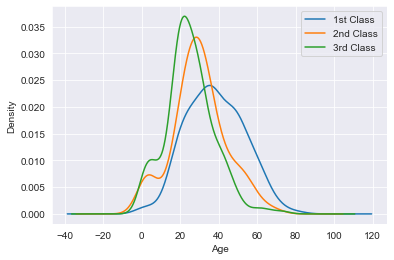

In [207]:
train.Age[train['Pclass']==1].plot(kind='kde')
train.Age[train.Pclass==2].plot(kind='kde')
train.Age[train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') ;

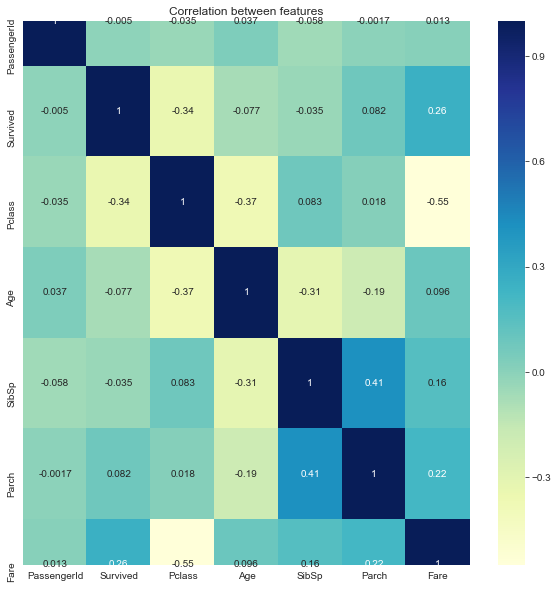

In [218]:
corr = train.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr,annot=True,cmap='YlGnBu',linecolor="magenta")
plt.title('Correlation between features');

In [220]:
corr['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

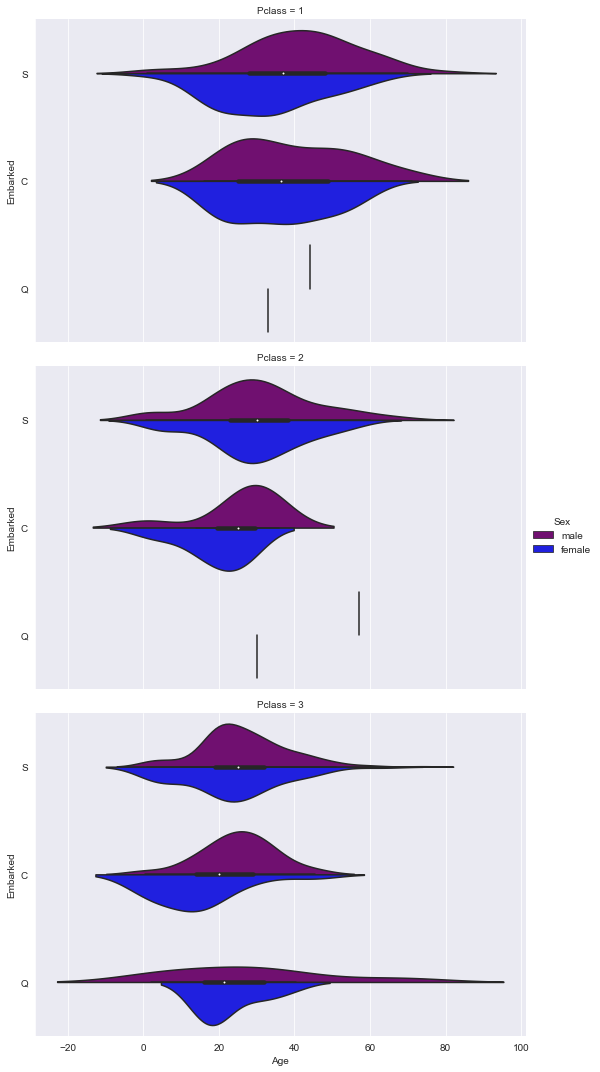

In [244]:
sns.factorplot(x="Age", y="Embarked", hue="Sex", row="Pclass",
                    data=train[train.Embarked.notnull()],palette={'male':"purple", 'female':"blue"},
                    kind="violin", split=True, aspect=1.5);

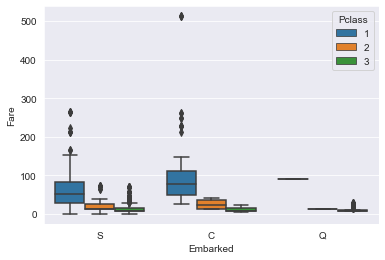

In [261]:
sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=train)

In [262]:
train['Embarked'] = train.Embarked.fillna(value='C')

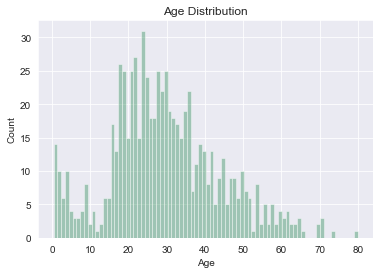

In [277]:
sns.distplot(train.Age.dropna(), bins=80, kde=False, color='Seagreen')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

In [318]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [320]:
test[test.Fare.isnull()]

PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Cabin Embarked  
152   NaN   NaN        S

In [328]:
#filling the missing fare value with median fare of Pclass 3, Embarked S value

median_fare = test[(test.Embarked=='S')&(test.Pclass==3)]['Fare'].median()
test.Fare = test.Fare.fillna(value=median_fare)

In [339]:
test['Deck']=test.Cabin.str[0]
train['Deck']=train.Cabin.str[0]
train.Deck.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


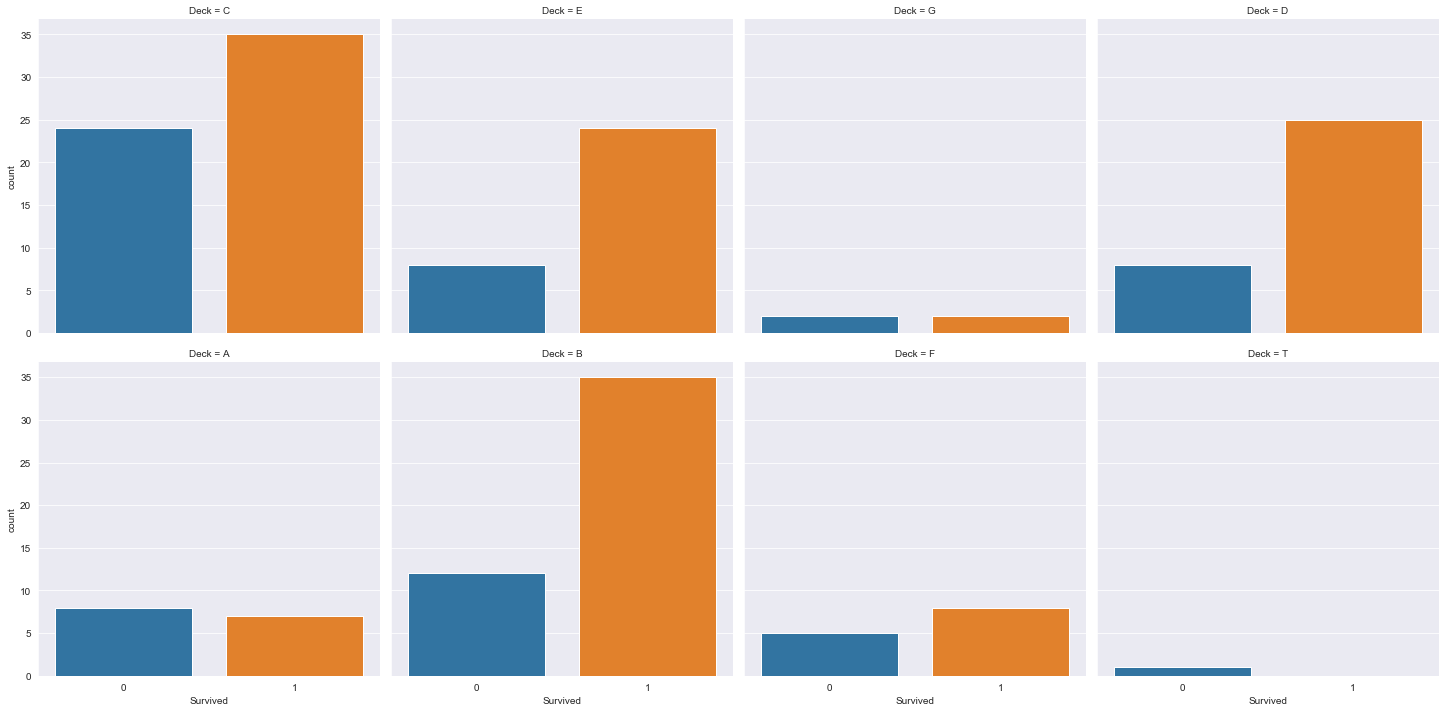

In [343]:
sns.factorplot('Survived', col='Deck', data=train[train.Deck.notnull()], kind='count', col_wrap=4)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


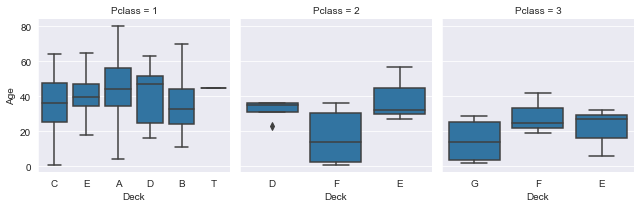

In [354]:
plot = sns.FacetGrid(train, col='Pclass', sharex=False)
plot.map(sns.boxplot, 'Deck', 'Age')

In [457]:
#filling the NaN values in Deck column with 'Z'
train.Deck.fillna('Z', inplace=True)
test.Deck.fillna('Z', inplace=True)


In [391]:
train.Deck.unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'Z'], dtype=object)

In [388]:
train = train.sort_values(by='Deck')

In [392]:
#No of passengers from the same family travelled
def familysize(df):
    df['FamilySize'] = df['SibSp'] + df['Parch']+1

familysize(train)
familysize(test)
print(train.FamilySize.value_counts())

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64


In [393]:
def FamilyClass(df):
    df.loc[df.FamilySize==1, 'Fclass'] = 'single'
    df.loc[(df.FamilySize>1)&(df.FamilySize<5),'Fclass'] = 'small'
    df.loc[(df.FamilySize>4),'Fclass'] = 'large'

FamilyClass(train)
FamilyClass(test)

In [395]:
train.Fclass.value_counts()

single    537
small     292
large      62
Name: Fclass, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


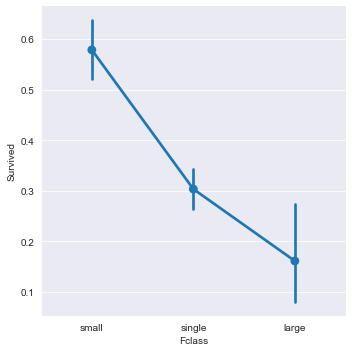

In [394]:
sns.factorplot(x='Fclass',y='Survived', data=train)

[good, short, okay, looong]
Categories (4, object): [short < good < okay < looong]


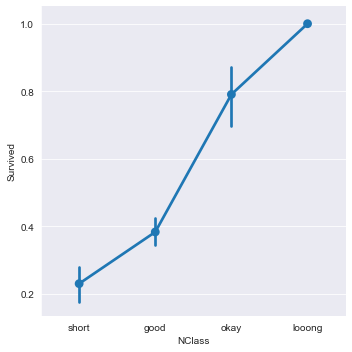

In [401]:
def NameLen(df, bins=[0,20,40,57,85], group_name=['short', 'good', 'okay', 'looong']):
    df['NLength'] = df['Name'].apply(lambda x: len(x))
    df['NClass'] = pd.cut(df.NLength, bins, labels=group_name)

NameLen(train)
NameLen(test)

sns.factorplot(x='NClass', y='Survived', data=train)
print(train.NClass.unique())

In [421]:
import re
def get_title(name):
    # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search('([A-Za-z]+)\.', name)
    #If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)

#Get all the titles and print how often each one occurs.
titles = train["Name"].apply(get_title)
print(pd.value_counts(titles))

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Jonkheer      1
Capt          1
Mme           1
Ms            1
Lady          1
Sir           1
Countess      1
Don           1
Name: Name, dtype: int64


In [419]:
train['Title'] = titles

In [428]:
train.loc[train.Title.isin(['Dona', 'Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']), 'Title'] = 'Rare Title'

In [431]:
#train.query("Title in ['Miss', 'Col']")
titlemap={'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'}
for key, value in titlemap.items():
    train.loc[train["Title"] == key, "Title"] = value

In [440]:
test['Title'] = test["Name"].apply(get_title)

In [441]:
test.loc[test.Title.isin(['Dona', 'Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']), 'Title'] = 'Rare Title'
titlemap={'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'}
for key, value in titlemap.items():
    test.loc[test["Title"] == key, "Title"] = value

In [442]:
test.Title.value_counts()

Mr            240
Miss           79
Mrs            72
Master         21
Rare Title      6
Name: Title, dtype: int64

In [459]:
from sklearn.preprocessing import LabelEncoder
labelEnc = LabelEncoder()
col_names = ['Embarked','Sex',"Title", 'Fclass','NClass','Deck']

for i in col_names:
    train[i] = labelEnc.fit_transform(train[i])
    test[i] = labelEnc.fit_transform(test[i])

In [461]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 445 to 890
Data columns (total 18 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int64
Deck           891 non-null int64
FamilySize     891 non-null int64
Fclass         891 non-null int64
NLength        891 non-null int64
NClass         891 non-null int64
Title          891 non-null int64
dtypes: float64(2), int64(13), object(3)
memory usage: 172.3+ KB


In [462]:
from sklearn.ensemble import RandomForestRegressor
#predicting missing values in age using Random Forest
def fill_missing_age(df):
    
    #Feature set
    age_df = df[['Age','Embarked','Fare', 'Parch', 'SibSp', 'Title','Pclass','FamilySize',
                 'Fclass','NLength',"NClass",'Deck']]
    # Split sets into train and test
    train  = age_df.loc[ (df.Age.notnull()) ]# known Age values
    test = age_df.loc[ (df.Age.isnull()) ]# null Ages
    
    # All age values are stored in a target array
    y = train.values[:, 0]
    
    # All the other values are stored in the feature array
    X = train.values[:, 1:]
    
    # Create and fit a model
    rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rtr.fit(X, y)
    
    # Use the fitted model to predict the missing values
    predictedAges = rtr.predict(test.values[:, 1:])
    
    # Assign those predictions to the full data set
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df

In [473]:
titanic=fill_missing_age(train)
titanic_test=fill_missing_age(test)

ValueError: Found array with 0 sample(s) (shape=(0, 11)) while a minimum of 1 is required.

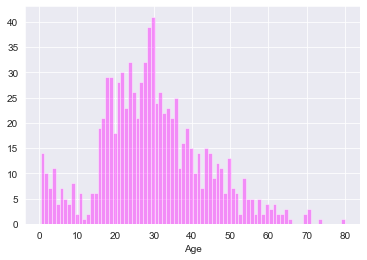

In [476]:
sns.distplot(titanic["Age"],bins=80,kde=False,color="magenta")

In [475]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 445 to 890
Data columns (total 18 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int64
Deck           891 non-null int64
FamilySize     891 non-null int64
Fclass         891 non-null int64
NLength        891 non-null int64
NClass         891 non-null int64
Title          891 non-null int64
dtypes: float64(2), int64(13), object(3)
memory usage: 172.3+ KB


In [477]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(titanic[['Age', 'Fare']])
titanic[['Age', 'Fare']] = scaler.transform(titanic[['Age', 'Fare']])

scaler = StandardScaler().fit(titanic_test[['Age', 'Fare']])
titanic_test[['Age', 'Fare']] = scaler.transform(titanic_test[['Age', 'Fare']])

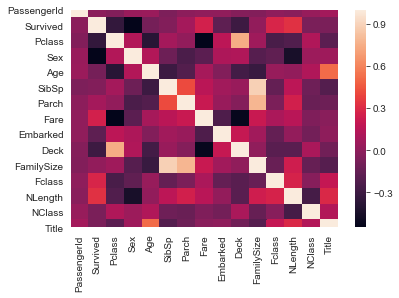

In [482]:
sns.heatmap(titanic.corr())

In [484]:
titanic.corr()['Survived'].sort_values

<bound method Series.sort_values of PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex           -0.543351
Age           -0.084727
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Embarked      -0.174199
Deck          -0.301116
FamilySize     0.016639
Fclass         0.283810
NLength        0.332350
NClass        -0.067477
Title         -0.071174
Name: Survived, dtype: float64>

<h1>Predictions</h1>

In [575]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

features = ['PassengerId','Pclass','Sex','Age','SibSp','Parch',
            'Fare','Embarked','Deck','FamilySize','NLength','Title']

label = 'Survived'
predictions=[]

train_df = pd.concat([X,y], axis=1)

train_df = train_df.reset_index(drop=True)

In [576]:
X = train_df[['PassengerId','Pclass','Sex','Age','SibSp','Parch',
            'Fare','Embarked','Deck','FamilySize','NLength','Title']]

y=train_df['Survived']

In [577]:
kf = KFold(n_splits=10, random_state=42, shuffle=False)
clf = LinearRegression()

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    clf.fit(X_train, y_train)
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index)
    y_pred = clf.predict(X_test)
    predictions.append(y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [578]:
predicted = np.concatenate(predictions, axis=0)

predicted[predicted>0.5] = 1
predicted[predicted<=0.5] = 0

In [587]:
accuracy = (titanic.Survived == predicted).mean()
accuracy

0.7901234567901234